1.98%
1.42%


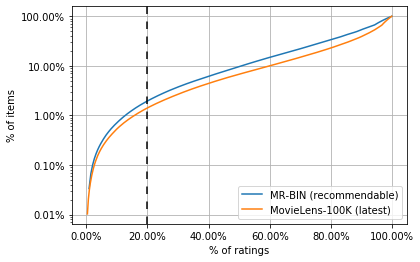

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

def get_ratios(df):
    item_percentages = [i / len(df) for i in range(1, len(df) + 1)]
    counts = list(df['count'])
    
    total_count = sum(counts)
    cum_sum = np.cumsum(counts)
    
    rating_percentages = [cum / total_count for cum in cum_sum]
    
    for index, percentage in enumerate(rating_percentages):
        if percentage >= 0.2:
            print(f'{item_percentages[index] * 100:.2f}%')
            break
    
    return rating_percentages, item_percentages

# MindReader
mr = pd.read_csv('../data_loading/mindreader/ratings.csv')

dftmp = mr[(mr.isItem) & mr.sentiment != 0][['userId', 'uri']].groupby('uri')['uri']\
    .agg(count='count').sort_values('count', ascending=False)

f, ax = plt.subplots()
plt.plot(*get_ratios(dftmp))

# MovieLens
ml = pd.read_csv(f'data/movielens.csv')

dftmp = ml[['userId', 'movieId']].groupby('movieId')['movieId']\
    .agg(count='count').sort_values('count', ascending=False)
plt.plot(*get_ratios(dftmp))

plt.yscale('log')

y_values = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in y_values])

x_values = ax.get_xticks()
ax.set_xticklabels(['{:,.2%}'.format(x) for x in x_values])

ax.legend(['MR-BIN (recommendable)', 'MovieLens-100K (latest)'])
plt.xlabel('% of ratings')
plt.ylabel('% of items')
plt.axvline(x=0.2, color='black', dashes=[5, 5])
plt.grid()
plt.savefig('distribution.pdf', bbox_inches='tight')
plt.show()